We have a data set named- titanic.csv, we have to classify wheather the passenger survived or not.

These are the variables in this data set


  PassengerId-                                                                        some id associated with each passenger

	survival-        Passenger Survived or Not 
	pclass -          Ticktet Class
	Sex-               Gender of Passenger
	Age- 		  Age in years
	sibsp-             No. of siblings / sposes aboard
	parch-            No. of parents / children aboard
	ticket-		  Ticket Number
	fare- 		  Passenger fare
	cabin-		  Canbin Number
	Embarked- 	  Port of Embarkation

We imported necessary libraries.

In [1574]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import math

Adding data set


In [1575]:
ds = pd.read_csv('/content/titanic.csv')

In [1576]:
ds.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now let's see the statistical measures.


In [1577]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We will check for missing values in the columns.

In [1578]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see the coloumn "Embarked" has only 2 NaN value. So we can remove the 2 rows.
Also we see for the coloumn "Cabin" there are 687 out of 891 columns.
So we can also drop this column "Cabin"


In [1579]:
ds.drop(axis="rows", labels = ds.index[ds['Embarked'].isna()], inplace = True)
ds.drop(axis="columns", labels="Cabin", inplace=True) 

In [1580]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Now we are filling median in the 177 rows of Age column as removing 177 rows is not feasible

In [1581]:
ds["Age"].fillna(ds["Age"].median(), inplace=True)

In [1582]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


As instructed in the assignment to Not consider Passenger ID

In [1583]:
ds.drop(axis="columns", labels="PassengerId", inplace=True) 

In [1584]:
ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We see "Name" has too many unique columns.

In [1585]:
ds["Name"].value_counts()

Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: Name, Length: 889, dtype: int64

Checking for "Ticket" how many unique values are there.

In [1586]:
ds["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [1587]:
ds.drop(axis="columns", labels="Ticket", inplace=True)

In [1588]:
ds.drop(axis="columns", labels="Name", inplace=True)

In [1589]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now we see "Sex" as male and female.
So we can use label encoding.

In [1590]:
ds["Sex"].value_counts()


male      577
female    312
Name: Sex, dtype: int64

Encoding male and female in Sex column

In [1591]:
ds['Sex'] = ds["Sex"].map({"male": 0, "female": 1})
ds["Sex"].value_counts()

0    577
1    312
Name: Sex, dtype: int64

In [1592]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


Now we will check for Embarked Column and Pclass

In [1593]:
ds["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1594]:
ds["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

###One Hot Encoding

Here we see 3 unique values "S", "C", "Q" for "Embarked" So doing one-hot Encoding.
Also for Pclass, we have 1, 2, 3 values but to know which class has higher priority and which has low we will do one-hot encoding.

In [1595]:

ds = pd.get_dummies(ds, columns=["Embarked", "Pclass"])

### Duplicate Cell
Now we are going to check for duplicate rows and remove them

In [1596]:
ds.duplicated().sum()

116

In [1597]:
ds.drop(axis="rows", labels=ds.index[ds.duplicated()], inplace=True)
ds.duplicated().sum()

0

In [1598]:
ds.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.00000,773.000000,773.000000,773.000000
mean,0.411384,0.375162,29.528357,0.530401,0.421734,34.761659,0.200517,0.075032,0.72445,0.269082,0.212160,0.518758
std,0.492403,0.484478,13.731264,0.991241,0.841380,52.425906,0.400647,0.263614,0.44708,0.443770,0.409103,0.499972
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,28.000000,0.000000,0.000000,15.900000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,36.000000,1.000000,1.000000,33.500000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [1599]:
ds.loc[:20,:]

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1
5,0,0,28.0,0,0,8.4583,0,1,0,0,0,1
6,0,0,54.0,0,0,51.8625,0,0,1,1,0,0
7,0,0,2.0,3,1,21.0750,0,0,1,0,0,1
8,1,1,27.0,0,2,11.1333,0,0,1,0,0,1
9,1,1,14.0,1,0,30.0708,1,0,0,0,1,0


###Feature Scaling
Now using Min-Max Normalization on Age and Fare columns


In [1600]:
x = ds["Age"] - np.min(ds["Age"])
y = np.max(ds["Age"]) - np.min(ds["Age"])
ds["Age"] = x/y
ds.loc[:20,:]

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,0.271174,1,0,7.2500,0,0,1,0,0,1
1,1,1,0.472229,1,0,71.2833,1,0,0,1,0,0
2,1,1,0.321438,0,0,7.9250,0,0,1,0,0,1
3,1,1,0.434531,1,0,53.1000,0,0,1,1,0,0
4,0,0,0.434531,0,0,8.0500,0,0,1,0,0,1
5,0,0,0.346569,0,0,8.4583,0,1,0,0,0,1
6,0,0,0.673285,0,0,51.8625,0,0,1,1,0,0
7,0,0,0.019854,3,1,21.0750,0,0,1,0,0,1
8,1,1,0.334004,0,2,11.1333,0,0,1,0,0,1
9,1,1,0.170646,1,0,30.0708,1,0,0,0,1,0


In [1601]:
x = ds["Fare"] - np.min(ds["Fare"])
y = np.max(ds["Fare"]) - np.min(ds["Fare"])
ds["Fare"] = x/y
ds.loc[:20,:]

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,0.271174,1,0,0.014151,0,0,1,0,0,1
1,1,1,0.472229,1,0,0.139136,1,0,0,1,0,0
2,1,1,0.321438,0,0,0.015469,0,0,1,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1,1,0,0
4,0,0,0.434531,0,0,0.015713,0,0,1,0,0,1
5,0,0,0.346569,0,0,0.016510,0,1,0,0,0,1
6,0,0,0.673285,0,0,0.101229,0,0,1,1,0,0
7,0,0,0.019854,3,1,0.041136,0,0,1,0,0,1
8,1,1,0.334004,0,2,0.021731,0,0,1,0,0,1
9,1,1,0.170646,1,0,0.058694,1,0,0,0,1,0


###Correlation
Now we are going to find the Correlation Matrix

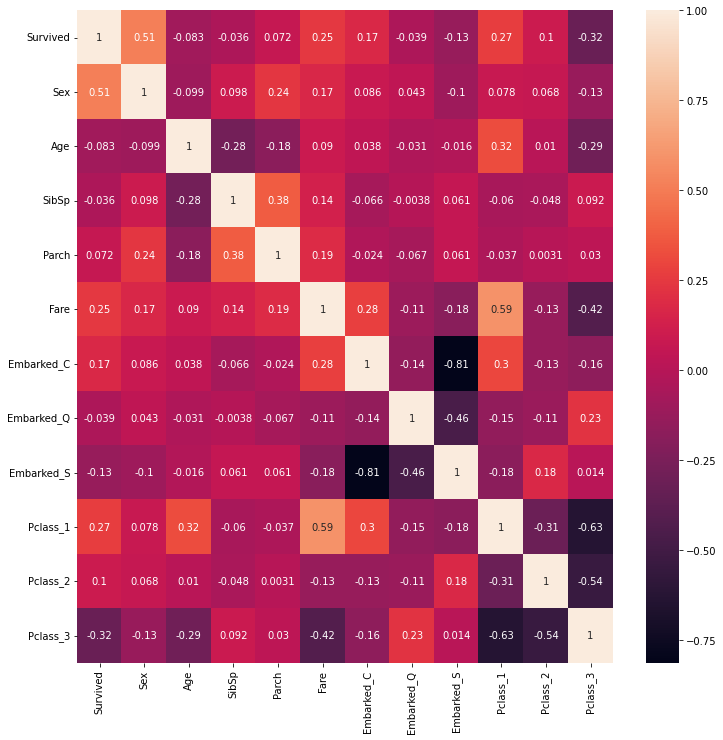

In [1602]:
plt.figure(figsize=(12,12))
sns.heatmap(ds.corr(), annot=True)

Here in the matrix, we see there is not that much dependency between cloumns.
If column1 and column2 has a value close or equal to 1 or -1, there is a high dependency between them.

If that value is close to 0 then, there is no dependency.

In [1603]:
ds.loc[:6,:]

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,0.271174,1,0,0.014151,0,0,1,0,0,1
1,1,1,0.472229,1,0,0.139136,1,0,0,1,0,0
2,1,1,0.321438,0,0,0.015469,0,0,1,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1,1,0,0
4,0,0,0.434531,0,0,0.015713,0,0,1,0,0,1
5,0,0,0.346569,0,0,0.016510,0,1,0,0,0,1
6,0,0,0.673285,0,0,0.101229,0,0,1,1,0,0


Now we will split our data in training and testing set.

In [1604]:
train = ds.sample(frac =0.77, replace = False)
test = ds.drop(train.index)

#convert dataframe to numpy array
train = train.to_numpy()        
test = test.to_numpy()

#Remove Survived column
x_train = np.delete(train, 0, 1)     
x_test = np.delete(test, 0, 1)

#Survived column
y_train = train[:,0]              
y_test = test[:,0]

In [1605]:
x_train

array([[0.        , 0.13294798, 5.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.17692888, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.19577783, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.2083438 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.39683338, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.560191  , 0.        , ..., 1.        , 0.        ,
        0.        ]])

Checking the dimensions of our x_test, x_train and y_test, y_train

In [1606]:
x_test.shape


(178, 11)

In [1607]:
x_train.shape

(595, 11)

In [1608]:
y_train.shape

(595,)

In [1609]:
y_test.shape

(178,)

In [1610]:
x_train = x_train.T
y_train = y_train.reshape((1, 595))

x_test = x_test.T
y_test = y_test.reshape((1, 178))

### Logistic Regression


w = weight matrix (n x 1)

b = parameter     (1 x 1)

x_train (n x m)  n= features m= rows

y_train (1 x m)  m= rows

A(y-predicted) = sigmoid(wT * x_train + b)



In [1611]:
def sigmoidFunction(w, x, b):                #Parameters => weight matrix and b
  z = np.dot(w.T, x) + b                     #output => 1/1+e^-{wTx + b}
  return (1.0/(1+np.exp(-z))) 

In [1612]:
def costFunc(m, Y, A):
  c = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
  return c  

In [1613]:
def logistic_regression(X, Y, alpha, itr, rows, col):
    
    m = rows    
    n = col     
    
    w = np.zeros((n,1))   # w = n x 1 
    b = 0              
    
    cost_list = []
    
    for i in range(itr):
        
        y_cap = sigmoidFunction(w, X, b)
        
        # cost function
        c = costFunc(m, Y, y_cap)
        
        
        dw = (1/m)*np.dot(y_cap - Y, X.T)         #d(cost)/dw = (y_cap - Y)*X.Transpose
        db = (1/m)*np.sum(y_cap - Y)              #d(cost)/db = (y_cap - Y)
        
        # Gradient Descent
        w = w - alpha*dw.T
        b = b - alpha*db
        
        cost_list.append(c)
        
        if(i%100 == 0):
            print("cost after ", i, "iteration is : ", c)
        
    return w, b, cost_list

In [1614]:
x_train.shape

(11, 595)

In [1615]:
iterations = 2500
alpha = 0.1
W, B, cost_list = logistic_regression(x_train, y_train, alpha, iterations, x_train.shape[1], x_train.shape[0])

cost after  0 iteration is :  0.6931471805599453
cost after  100 iteration is :  0.5491700468871189
cost after  200 iteration is :  0.5143330373001338
cost after  300 iteration is :  0.5006129160019058
cost after  400 iteration is :  0.49414552685488006
cost after  500 iteration is :  0.4907140362136465
cost after  600 iteration is :  0.48869241374391537
cost after  700 iteration is :  0.4873742444433834
cost after  800 iteration is :  0.48642970146623676
cost after  900 iteration is :  0.4856966122893298
cost after  1000 iteration is :  0.48509176697706613
cost after  1100 iteration is :  0.4845707499675112
cost after  1200 iteration is :  0.4841088687152078
cost after  1300 iteration is :  0.48369175990374846
cost after  1400 iteration is :  0.48331062195136615
cost after  1500 iteration is :  0.48295973339598114
cost after  1600 iteration is :  0.4826351318491952
cost after  1700 iteration is :  0.4823338958043605
cost after  1800 iteration is :  0.48205374585313804
cost after  1900

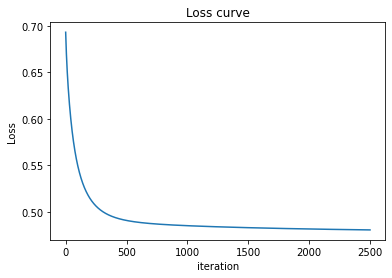

In [1616]:
plt.plot(np.arange(iterations), cost_list)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

Taking thresold at 0.5

For the test set, we will now see the predicted and actual y values

In [1617]:
y_pred = sigmoidFunction(W, x_test, B)
y_pred = y_pred > 0.5
y_pred = np.array(y_pred, dtype = 'int64')
y_pred  # probabilities (if greater than 0.5 it is 1 or True,  else 0 or False)

array([[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1]])

In [1618]:
y_test = np.array(y_test, dtype = 'int64')
y_test

array([[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0]])

Caluclating f1_score

Let us assume following variables

TN(true negative):- actual = 0, predicted = 0

TP(ture positive):- actual = 1, predicted = 1

FP(false positive):- actual = 0, predicted = 1

FN(false negative):- actual = 1, predicted = 0



Precision : TP / (TP+FP) 

Recall : TP / (TP+FN) 

F1 Score : (2 * Precision * Recall) / (Precision+Recall)




In [1619]:
def computeVariables(y_test, y_pred):
  tp = np.sum((y_test == 1) & (y_pred == 1))
  tn = np.sum((y_test == 0) & (y_pred == 0))
  fp = np.sum((y_test == 0) & (y_pred == 1))
  fn = np.sum((y_test == 1) & (y_pred == 0))
  return tp, tn, fp, fn

In [1620]:
tp, tn, fp, fn = computeVariables(y_test, y_pred)
print("true positive = ", tp)
print("true negative = ", tn)
print("false positive = ", fp)
print("false negative = ", fn)

true positive =  54
true negative =  81
false positive =  20
false negative =  23


In [1621]:
def f1_score(tp, tn, fp, fn):
  precision = tp / (tp+fp)
  recall = tp / (tp+fn)
  f1_score = (2 * precision * recall) / (precision + recall)
  print("F1_Score Percentage = ",f1_score*100)

In [1622]:
f1_score(tp, tn, fp, fn)

F1_Score Percentage =  71.523178807947


###Naive Bayes


Reshaping again our x_test, x_train and y_test, y_train

We need rows x cols 

In [1623]:
x_train = x_train.T
y_train = y_train.T

x_test = x_test.T
y_test = y_test.T

In [1624]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (595, 11)
x_test (178, 11)
y_train (595, 1)
y_test (178, 1)


Calculating P(Y = yi)
  
probability (y = Survived) = no. of people survived / m

m = rows

In [1625]:
p_survived = np.count_nonzero(y_train)/len(y_train)
p_survived

0.4050420168067227

Computing the guassian function

In [1626]:
def GaussianFunction(mean, variance, x):
  power = -1.0*(x-mean)*(x-mean)/(2.0*variance)

  #product of all the denominators for all X= x0, x1, x2, ...
  deno = np.prod(np.sqrt(2.0*np.pi*variance))
  
  #         product of all the numerators / denominator
  return np.prod(np.exp(power))/deno

In [1627]:
x_train

array([[0.        , 0.13294798, 5.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.17692888, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.19577783, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.2083438 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.39683338, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.560191  , 0.        , ..., 1.        , 0.        ,
        0.        ]])

Training our Model

In [1628]:
x_trainSurvived = []
x_trainNotSurvived = []
for i in range(len(y_train)):
  if(y_train[i] == 1):
    x_trainSurvived.append(x_train[i])
  else:
    x_trainNotSurvived.append(x_train[i])

Mean and Variance



In [1629]:
Survived_Mean = np.mean(x_trainSurvived, axis=0)
Survived_var = np.var(x_trainSurvived, axis=0)
NotSurvived_Mean = np.mean(x_trainNotSurvived, axis=0)
NotSurvived_var = np.var(x_trainNotSurvived, axis=0)

In [1630]:
print("Mean Survived",Survived_Mean)
print("Variance Survived",Survived_var)
print("Mean Not Survived",NotSurvived_Mean)
print("Var Not Survived",NotSurvived_var)

Mean Survived [0.66804979 0.33927445 0.51037344 0.52282158 0.09286224 0.24481328
 0.0746888  0.68049793 0.37759336 0.26970954 0.3526971 ]
Variance Survived [0.22175927 0.03198349 0.56524509 0.63122191 0.01434704 0.18487974
 0.06911038 0.2174205  0.23501661 0.19696631 0.22830185]
Mean Not Survived [0.16101695 0.37313906 0.56497175 0.34745763 0.04658771 0.1440678
 0.07909605 0.77683616 0.16949153 0.18644068 0.6440678 ]
Var Not Survived [0.13509049 0.02748019 1.38137189 0.68435794 0.00409281 0.12331227
 0.07283986 0.17336174 0.14076415 0.15168055 0.22924447]


In [1631]:
def Probability(meanSurvived, varSurvived, meanNotSurvived, varNotSurvived, x, pSurvived):
  
  P_X_given_Survived = GaussianFunction(meanSurvived, varSurvived, x)
  
  P_X_given_NotSurvived = GaussianFunction(meanNotSurvived, varNotSurvived, x)
  
  pSur_liklihood = pSurvived*P_X_given_Survived
  
  pNotSur_liklihood = (1-pSurvived)*P_X_given_NotSurvived
  if(pSur_liklihood > pNotSur_liklihood):
    return 1
  return 0

In [1632]:
x_test.shape

(178, 11)

Testing Naive Bayes

In [1633]:
def testNaiveBayes(rows):
  y_predict = []
  for i in range(rows):
    y_predict.append(Probability(Survived_Mean, Survived_var, NotSurvived_Mean, NotSurvived_var, x_test[i], p_survived))
  return y_predict


In [1634]:
rows = len(x_test)
y_predict = testNaiveBayes(rows)
y_predict = np.array(y_predict, dtype = 'int64')
y_predict

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0])

Making y_test in same dimension as y_predict

In [1635]:
y_test = y_test.T

In [1636]:
tp, tn, fp, fn = computeVariables(y_test, y_predict)
print("true positive = ", tp)
print("true negative = ", tn)
print("false positive = ", fp)
print("false negative = ", fn)

true positive =  53
true negative =  84
false positive =  17
false negative =  24


In [1637]:
f1_score(tp, tn, fp, fn)

F1_Score Percentage =  72.10884353741497
